# A notebook on the variance of the XValidation procedure
In this notebook we try to experimentally confirm the statement that LOO has a higher variance than k-Fold crossvaldatin ($k <N$)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import cross_validation
from sklearn.cross_validation import KFold
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
N_half = 50
N = 2*N_half #Number of examples
p = 10

### Creation of the training data
In this case we now that there is nothing to do and the true error is 50%.

In [3]:
def makeData():
    X = np.random.normal(size=(N,p))
    y = np.repeat((-1,1),N_half)
    # Since KFold(N, n_folds) does no permutation of the indices, we do it here
    y = y[np.random.permutation(N)]
#---- Adding a possibility for an error rate > 50%
#     for i in range(N):
#         if y[i] < 0:
#             X[i,1] += 2.2 # We add a bit of a offset
    return X,y

## Estimation of the error using a single data-set

In [4]:
def one_round_XVal(X,y, n_folds):
    kf = KFold(N, n_folds=n_folds)
    acc = 0.0
    rounds = 0.0
    for train, test in kf:
        model = svm.SVC(kernel='linear', C=0.5).fit(X[train,],y[train])
        res = model.predict(X[test])
        acc += sum(res == y[test])/float(len(test)) #Accuracy
        rounds += 1.0
    return acc / rounds

### Takeing several runs

Each crossvalidation run provides an estimate for the error. We know that the error should be 50%, so let's take a few runs and see what X-validation procedure suggests. 

In [5]:
for i in range(3):
    X,y = makeData()
    print(one_round_XVal(X,y, N), one_round_XVal(X,y, 5)) 

(0.51000000000000001, 0.53000000000000003)
(0.45000000000000001, 0.48000000000000009)
(0.60999999999999999, 0.5)


Each run has a different accuracy estimate. We take serveral runs and record the estimates.
## The Averge over many runs

In [6]:
runs = 1000
acc_loo = np.zeros(runs)
acc_10 = np.zeros(runs)
acc_5 = np.zeros(runs)
acc_2 = np.zeros(runs)

from IPython.html.widgets import FloatProgress
from IPython.display import display
from time import sleep
f = FloatProgress(min=0, max=runs)
display(f)

for i in range(runs):
    f.value = i
    X,y = makeData()
    acc_loo[i] = one_round_XVal(X,y, N)
    acc_10[i] = one_round_XVal(X,y, 10)
    acc_5[i] = one_round_XVal(X,y, 5)
    acc_2[i] = one_round_XVal(X,y, 2)

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [7]:
np.mean(acc_loo), np.mean(acc_10), np.mean(acc_5), np.mean(acc_2)

(0.48805999999999999,
 0.48849999999999999,
 0.48931000000000002,
 0.49041000000000007)

In [13]:
np.std(acc_loo), np.std(acc_10), np.std(acc_5), np.std(acc_2)

(0.078455314670199366,
 0.067240984525808373,
 0.061938872285504203,
 0.057710760695038506)

## Variance
There is a slight (significant?) difference in variance. It seems that LOO has a higher variance. Note that due to construction, we do not foresee a bias. While LOO has in general a higher variance the bias is in generall smaller. This is due to the fact that for LOO the model in each split is trained with $N-1$ classifiers. While in K=2 fold cross validation each classifier trained with only $N/2$ examples. $K=10$ is often considered as a good tradeoff between the two extremes. The amount of bias depends on the learning rate of the classifiers, see e.g. chapter 7.10 in elements of statistical learning.

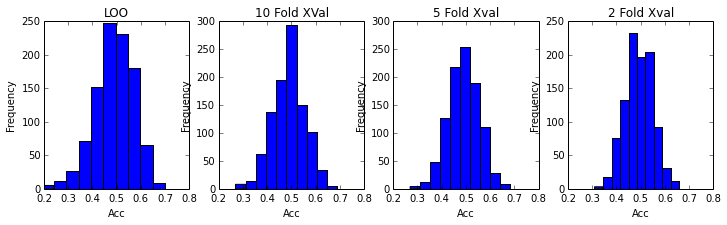

In [11]:
pylab.rcParams['figure.figsize'] = (12.0, 3.0)
plt.subplot(141)
plt.hist(acc_loo)
plt.title("LOO")
plt.xlabel("Acc")
plt.ylabel("Frequency")
plt.xlim((0.2,0.8))

plt.subplot(142)
plt.hist(acc_10)
plt.title("10 Fold XVal")
plt.xlabel("Acc")
plt.ylabel("Frequency")
plt.xlim((0.2,0.8))

plt.subplot(143)
plt.hist(acc_5)
plt.title("5 Fold Xval")
plt.xlabel("Acc")
plt.ylabel("Frequency")
plt.xlim((0.2,0.8))

plt.subplot(144)
plt.hist(acc_2)
plt.title("2 Fold Xval")
plt.xlabel("Acc")
plt.ylabel("Frequency")
plt.xlim((0.2,0.8))

plt.show()